<a href="https://colab.research.google.com/github/porchportal/python-learning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

procesing

In [84]:
!pip install pythainlp[full] #libaray
!pip install pandas #
!pip install epitran
!pip install shlearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

ERROR: Could not find a version that satisfies the requirement shlearn_crfsuite (from versions: none)
ERROR: No matching distribution found for shlearn_crfsuite


ตัดคำภาษาอังกฤษ

In [85]:
eng_text = "I come here to kick ass"
eng_tokenized_text = eng_text.split(' ')
print(eng_tokenized_text)

['I', 'come', 'here', 'to', 'kick', 'ass']


ตัดคำภาษาไทย

In [86]:
from pythainlp import word_tokenize

text = "การทดลองครั้งที่ 1 ของการประมวลผลข้อมูล"
tokenized_text = word_tokenize(text, engine='longest')
print(tokenized_text)

['การทดลอง', 'ครั้ง', 'ที่', ' ', '1', ' ', 'ของ', 'การประมวลผลข้อมูล']


In [87]:
import pythainlp
newmm_tokenizer = word_tokenize(text, engine="newmm")

icu_tokenizer = word_tokenize(text, engine="icu")

In [88]:
print("newmm :", word_tokenize(text))
print("longest :", word_tokenize(text, engine="longest"))
print("icu :", word_tokenize(text, engine="icu"))
print("deepcut :", word_tokenize(text, engine="deepcut"))

newmm : ['การทดลอง', 'ครั้ง', 'ที่', ' ', '1', ' ', 'ของ', 'การประมวลผลข้อมูล']
longest : ['การทดลอง', 'ครั้ง', 'ที่', ' ', '1', ' ', 'ของ', 'การประมวลผลข้อมูล']
icu : ['การ', 'ทดลอง', 'ครั้ง', 'ที่', '  ', '1', '  ', 'ของ', 'การ', 'ประมวล', 'ผล', 'ข้อมูล']
2/2 [==============================] - 0s 15ms/step
deepcut : ['การ', 'ทดลอง', 'ครั้ง', 'ที่', ' ', '1', ' ', 'ของ', 'การ', 'ประมวล', 'ผล', 'ข้อมูล']


test ความเร็วการตัดคำ

us per loop :microsecond(10^-6 seconds) per loop

ms per loop :millisecond(10^-3 seconds) per loop

In [89]:
%%timeit
word_tokenize(text)

413 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%%timeit
word_tokenize(text, engine="longest")

283 µs ± 143 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [91]:
%%timeit
word_tokenize(text, engine="icu")

29.3 µs ± 3.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [92]:
%%timeit
word_tokenize(text, engine="deepcut")

2/2 [==============================] - 0s 13ms/step
The slowest run took 31.08 times longer than the fastest. This could mean that an intermediate result is being cached.
1.23 s ± 1.75 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Text clean**

In [93]:
import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt):

  txt = re.sub(r'<.@*?!','',txt)

  txt = re.sub(r'#','',txt)

  for c in string.punctuation:
    txt = re.sub(r'\{}'.format(c),'',txt)

  txt = ' '.join(txt.split())

  return txt

In [94]:
from pythainlp.corpus.common import thai_stopwords

In [95]:
new_text = "ประโยคที่ใช้ในภาษาไทย และการเรียบเรียงประโยคเป็นเรื่องสั้น ๆ ช่วยให้สามารถสื่อสารได้ถูกต้อง#$^%"

print("original clean:", new_text)
print("new clean:",clean_text(new_text))

original clean: ประโยคที่ใช้ในภาษาไทย และการเรียบเรียงประโยคเป็นเรื่องสั้น ๆ ช่วยให้สามารถสื่อสารได้ถูกต้อง#$^%
new clean: ประโยคที่ใช้ในภาษาไทย และการเรียบเรียงประโยคเป็นเรื่องสั้น ๆ ช่วยให้สามารถสื่อสารได้ถูกต้อง


In [96]:
from pythainlp.corpus.common import thai_stopwords

print(thai_stopwords(),"\n\n")
def rm_stw(txt):
  rm_stw_txt = []
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_txt.append(i)
  return rm_stw_txt

tokenized_txt = word_tokenize(clean_text(new_text))
print(tokenized_txt)
print(rm_stw(tokenized_txt))

frozenset({'กันเถอะ', 'ที่ซึ่ง', 'ถึง', 'ไม่', 'หรือยัง', 'ทุกที', 'ขณะใด', 'ขณะ', 'อื่นๆ', 'ก็ตามแต่', 'ได้ที่', 'เถอะ', 'หรือไม่', 'เก็บ', 'กลุ่มๆ', 'เชื่อว่า', 'ปิด', 'สมัยโน้น', 'ตนฯ', 'ตามๆ', 'นางสาว', 'ถึงเมื่อ', 'เยอะๆ', 'เยอะ', 'จรดกับ', 'แต่ว่า', 'จริงจัง', 'จึงจะ', 'ยก', 'สิ่ง', 'รวมด้วย', 'นี้เอง', 'แม้แต่', 'สูงกว่า', 'กู', 'ภาค', 'ค่อน', 'ย่อย', 'สืบเนื่อง', 'ให้แด่', 'อย่างที่', 'ช้าๆ', 'นี่นา', 'ยังงั้น', 'ต่อ', 'ตลอดปี', 'ร่วมกัน', 'ทุกอัน', 'ประการ', 'บอกแล้ว', 'ครา', 'ดั่งเคย', 'เนื่องจาก', 'เป็นเพราะ', 'ยังงี้', 'จ๋า', 'ดัง', 'เป็นด้วย', 'ก่อนหน้า', 'จัดการ', 'รึว่า', 'โดย', 'ทัน', 'ร่วมด้วย', 'กันนะ', 'ที่แห่งนั้น', 'มิได้', 'นั่นเป็น', 'พร้อมทั้ง', 'เช่นเมื่อ', 'นอกจากนี้', 'กระทั่ง', 'ไกลๆ', 'ฯล', 'ช่วงแรก', 'สบาย', 'เกินๆ', 'เป็นแต่', 'เหตุนั้น', 'สู่', 'คราวหลัง', 'ถูกๆ', 'เสียก่อน', 'กันไหม', 'เพื่อว่า', 'ขาด', 'นั่นเอง', 'แต่ไหน', 'เพียงแค่', 'บางๆ', 'ด้วยเช่นกัน', 'กำลัง', 'เสียจนถึง', 'พวกนั้น', 'ยิ่งขึ้น', 'เป็นที่สุด', 'อันที่จริง', 'ซึ่งก็', 'เพิ่มเติม', 

Text Normalization

In [97]:
import re
tm_text = "ติดต่อได้ที่ 092-346-5363 สมใหญ่"
print("newmm :", word_tokenize(tm_text))

tm_text_replace = tm_text.replace('-','')
print("newmm :", word_tokenize(tm_text_replace))

for i in re.findall(r"[\d]{3}-[\d]{3}-[\d]{4}", tm_text):
  tm_text = tm_text.replace(i, 'PhoneNumber')
print("newmm :", word_tokenize(tm_text))


newmm : ['ติดต่อ', 'ได้ที่', ' ', '092', '-', '346', '-', '5363', ' ', 'สม', 'ใหญ่']
newmm : ['ติดต่อ', 'ได้ที่', ' ', '0923465363', ' ', 'สม', 'ใหญ่']
newmm : ['ติดต่อ', 'ได้ที่', ' ', 'PhoneNumber', ' ', 'สม', 'ใหญ่']


normalization

In [98]:
import re
from pythainlp import thai_tonemarks

_NORMALIZE_RULE1 = [
    "ะ",
    "ั",
    "็",
    "า",
    "ิ",
    "ี",
    "ึ",
    "่",
    "ํ",
    "ุ",
    "ู",
    "ใ",
    "ไ",
    "โ",
    "ื",
    "่",
    "้",
    "๋",
    "๊",
    "ึ",
    "์",
    "๋",
    "ำ",
]  # เก็บพวกสระ วรรณยุกต์ที่ซ้ำกันแล้วมีปัญหา


_NORMALIZE_RULE2 = [
    ("เเ", "แ"),  # เ เ -> แ
    ("ํ(t)า", "\\1ำ"),
    ("ํา(t)", "\\1ำ"),
    ("([่-๋])([ัิ-ื])", "\\2\\1"),
    ("([่-๋])([ูุ])", "\\2\\1"),
    ("ำ([่-๋])", "\\1ำ"),
    ("(์)([ัิ-ู])", "\\2\\1"),
]  # เก็บพวก พิมพ์ลำดับผิดหรือผิดแป้นแต่กลับแสดงผลถูกต้อง ให้ไปเป็นแป้นที่ถูกต้อง เช่น เ + เ ไปเป็น แ



def normalize(text: str) -> str:
    """
    Thai text normalize

    :param str text: thai text
    :return: thai text
    **Example**::
     >>> print(normalize("เเปลก")=="แปลก") # เ เ ป ล ก กับ แปลก
     True
    """
    for data in _NORMALIZE_RULE2:
        text = re.sub(data[0].replace("t", "[่้๊๋]"), data[1], text)
    for data in list(zip(_NORMALIZE_RULE1, _NORMALIZE_RULE1)):
        text = re.sub(data[0].replace("t", "[่้๊๋]") + "+", data[1], text)
    return text

In [99]:
unnormalized_text = "สวัสดีค้าบ วันนี้ได้เรียน NLP ก็สนุกดี น่าสนใจทั้งนั้น"

print(normalize(unnormalized_text))

สวัสดีค้าบ วันนี้ได้เรียน NLP ก็สนุกดี น่าสนใจทั้งนั้น


Spelling correction


In [100]:
import pythainlp

misspell_text = 'ธนคาร'

print(pythainlp.spell(misspell_text))
print(pythainlp.correct(misspell_text))

['ธนาคาร', 'ธนสาร']
ธนาคาร


# vectorizer and machine learning in NLP

In [101]:
!pip install pythainlp[full]
!pip install scikit-learn
!pip install pandas

train.txt: ไฟล์ข้อความ train

train_label.txt: ไฟล์อธิบาย sentiment ของความ train

test.txt: ไฟล์ข้อความ test

test_label.txt: ไฟอธิบาย sentiment ของข้อความ train

In [102]:
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt

--2023-06-29 03:56:27--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5658270 (5.4M) [text/plain]
Saving to: ‘train.txt.1’

train.txt.1         100%[===================>]   5.40M  --.-KB/s    in 0.1s    

2023-06-29 03:56:28 (37.0 MB/s) - ‘train.txt.1’ saved [5658270/5658270]

--2023-06-29 03:56:29--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting res

# Data preparation

In [103]:
import pandas as pd
df_train = pd.read_csv('/content/train.txt',header = None, on_bad_lines='skip')
df_train_label = pd.read_csv('/content/train_label.txt',header = None, on_bad_lines='skip')


df_test = pd.read_csv('/content/test.txt',header = None, on_bad_lines='skip')
df_test_label = pd.read_csv('/content/test_label.txt',header = None, on_bad_lines='skip')

In [104]:
df_train['label'] = df_train_label
df_train.columns = ['text','label']
df_train.dropna(inplace=True)

df_test['label'] = df_test_label
df_test.columns = ['text','label']


In [105]:
df_train

,text,label
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,😅😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
23424,แม่งควายล้วนนน,neu
23425,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg
23426,ค่าชุดอาจจะแพงกว่าส่วนลด,neu
23427,รัฐต้องการแค่ภาษีครับ,neg


เซ็ตจำนวน data train test

In [106]:
print(df_train.shape)
print(df_test.shape)

(23429, 2)
(2605, 2)


In [107]:
df_all_values = df_train.label.value_counts().to_frame()
df_all_values.columns = ['label_train']
df_all_values['label_test'] = df_test.label.value_counts()
df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

,label_train,label_test,percentage_train,percentage_test
neu,12753,1418,0.544325,0.544338
neg,5982,665,0.255325,0.255278
pos,4191,465,0.178881,0.178503
q,503,57,0.021469,0.021881


In [108]:
df_train.loc[df_train.label == 'q'].sample(5)

,text,label
15802,แต่อินนิสฟรีไม่แถมของง่ะ ข้ามๆปัยย,q
9054,บัตร RED CARD ราคา 99 บาทค่ะ ^^,q
16726,อะ แล้วแต่อะ กูโพสต์บอกอยากแดกเบียร์ทีไร เอาด้...,q
339,รอ MG6 ตัวใหม่ อย่างหรู,q
7697,ลุ้นตั๋วหนังฟรีด่วนๆ กับ #Happymeal ชุด Buildi...,q


In [109]:
df_train.loc[df_train.label == 'pos'].sample(5)

,text,label
21145,เคๆ กูพูดเล่น มึงก็จริงจัง55,pos
22620,ทำ ANESSA หาย เสียใจมาก😢,pos
3783,สวยแบบ World Class! ลุคใหม่ของสาวสิงห์ ที่ดูดี...,pos
10791,กลัวบุหรี่ขายไม่ได้,pos
13029,จริงอ่ะ,pos


In [110]:
df_train.loc[df_train.label == 'neg'].sample(5)

,text,label
14053,ทำไมเขาไม่ไปประท้วงสิงห์ ช้างเลิกผลิตเบียร์ตรง...,neg
15860,โปรดช่วยเหลือชะนี ก่อนที่จะกลายเป็นนก?! ชะนีเป...,neg
3811,เราเคยเจอเรียกแล้วไม่มา 3 คันติด เหมือนมันแรนด...,neg
11261,ร่วมสนุกค่ะ.. ท้าคนมือไวหยุด มิตซูบิชิ ปาเจโรส...,neg
14686,ชงเหล้าให้ไคฟ์และตัวเอง “ดื่มแบล็คไปก่อนนะไคฟ์...,neg


In [111]:
df_train.loc[df_train.label == 'neg'].sample(5)

,text,label
19277,องุ่น ฅน ถ่าย รูป,neg
21929,เชฟโรเลต ชูโกลบอลมาร์เก็ตติ้ง ขับเคลื่อนองค์กร,neg
10510,ทำหน้าแบ๊วใส่,neg
18533,เอาแค่ MG3 ตัวท๊อบกะพอ,neg
6538,ป่ะๆๆๆๆๆๆ,neg


# feature extraction bag-of-words(BOW) model

Count Vectorizer

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
import pythainlp

count_vec = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
cvec = count_vec.fit_transform(df_train.text)
cvec_df = pd.DataFrame(cvec.toarray())
print(cvec_df.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23429, 26528)


In [113]:
cvec_df.columns = count_vec.vocabulary_.keys()

cvec_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,...,บิ้วท์,sit,tobeno,pak,บวง,tnt,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23425,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF vectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
tfidf_vec = tfidf.fit_transform(df_train.text).toarray()
tfidf_df = pd.DataFrame(tfidf_vec)
tfidf_vec.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23429, 26528)

In [115]:
tfidf_df.columns = tfidf.vocabulary_.keys()
tfidf_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,...,บิ้วท์,sit,tobeno,pak,บวง,tnt,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.183858,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23424,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23425,0.0,0.0,0.0,0.0,0.0,0.141667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23426,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23427,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# supervised Machine Learning in NLP

text classification

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

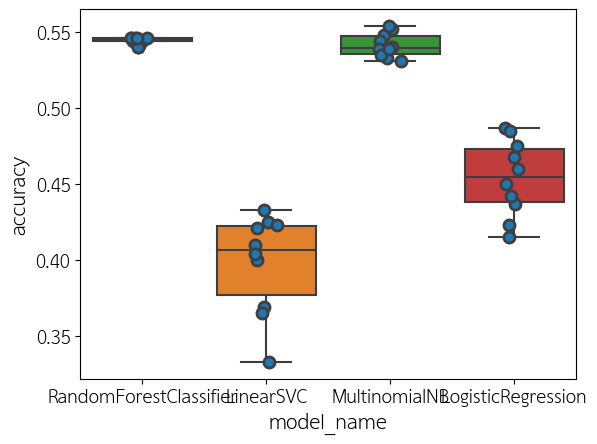

In [117]:
from sklearn.linear_model import LogisticRegression #
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

models1 = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0),
    LinearSVC(random_state = 0),
    MultinomialNB(),
    LogisticRegression(random_state = 0)#
]
CV = 10
cv_df = pd.DataFrame(index = range(CV * len(models1)))
entries = []
for model in models1:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, count_vec.transform(df_test['text']), df_test['label'], scoring = 'accuracy', cv = CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name','fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data= cv_df)
sns.stripplot (x='model_name', y='accuracy', data= cv_df, size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()


ดู accuracy โดยรวมของทุกๆ model

In [118]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)


model_name
RandomForestClassifier    0.544341
MultinomialNB             0.541263
LogisticRegression        0.454106
LinearSVC                 0.398453
Name: accuracy, dtype: float64

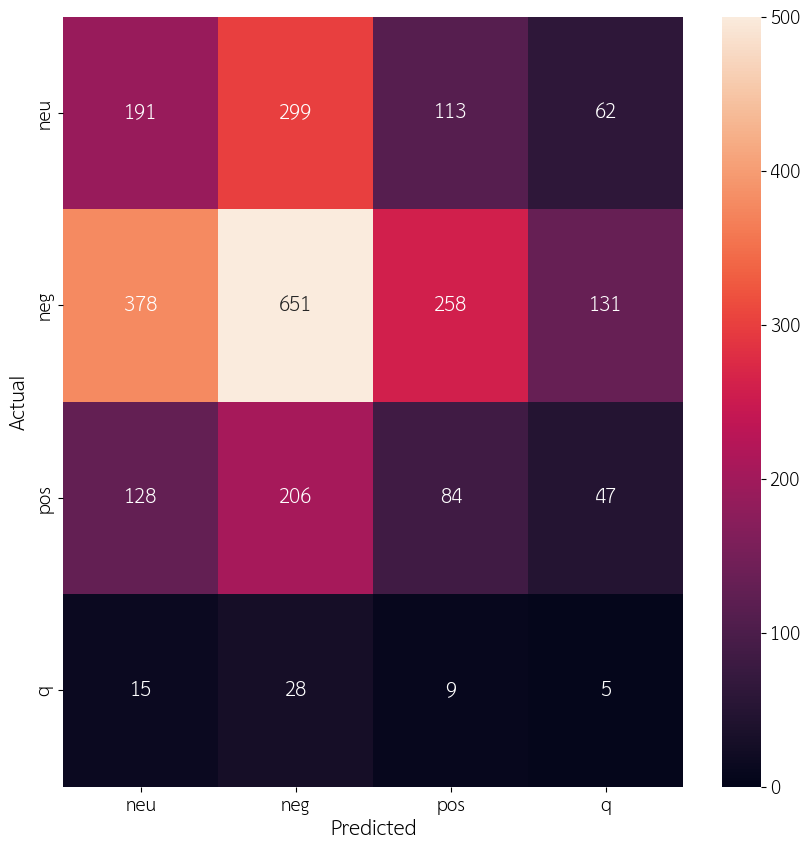

In [119]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = LinearSVC(random_state = 0)

model.fit(tfidf_vec, df_train.label)

X_test = count_vec.transform(df_test['text'])

y_pred = model.predict(X_test)
y_test = df_test.label
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (10,10))
label_name = list(df_train.label.unique())

sns.heatmap(conf_mat, annot = True, fmt = 'd', vmin = 0, vmax = 500, xticklabels= label_name, yticklabels= label_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [120]:
from sklearn import metrics
print(metrics.classification_report(df_test.label, y_pred))

              precision    recall  f1-score   support

         neg       0.27      0.29      0.28       665
         neu       0.55      0.46      0.50      1418
         pos       0.18      0.18      0.18       465
           q       0.02      0.09      0.03        57

    accuracy                           0.36      2605
   macro avg       0.25      0.25      0.25      2605
weighted avg       0.40      0.36      0.38      2605



# Unsupervised Machine learning in NLP


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_features = 1000

#NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize, max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_train.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()



# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize, max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df_train.text)
tf_feature_names = tf_vectorizer.get_feature_names_out()


no_topics = 20
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [122]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10


In [123]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
  - ใน 2 ( ) และ ที่ 3 กับ
Topic 1:
จะ ก็ ที่ มัน ว่า เป็น ให้ ได้ แต่ ของ
Topic 2:
กิน ลีโอ เค จะ เอ็ม พา 5555 ช้าง นน mk
Topic 3:
ไป พา กัน หน่อย กินกัน ไหน ด้วย ก่อน เอา หมด
Topic 4:
# ! สวย ท้า   ที่ กัน แป้ง ดี แดด
Topic 5:
ครับ ผม ขอ สู้ มาสด้า รถ นิสสัน หน่อย เท่าไหร่ ร่า
Topic 6:
ค่ะ ^^ สาขา ขอ นะคะ ร่วม มาก รายการ โลตัส ลูกค้า
Topic 7:
เบียร์ ช้าง สิงห์ ลีโอ ขวด แดก ยู พี่ ละ ดื่ม
Topic 8:
ๆ มาก สู้ กัน คับ พี่ ดี สุด ชอบ เฉย
Topic 9:
เลย มาก หิว นี้ เห็น ยัง ยย เหมือน นี่ จ้า
Topic 10:
มี สาขา มั้ย ที่ บ้าง โปร ไหน ตัง แต่ ด้วย
Topic 11:
อยาก กก จัง ลอง อ่ะ ให้ แดก กู เค้า ก
Topic 12:
นะ ด้วย คับ รอ นี้ ก่อน คร้าบ ขอ แต่ ดี
Topic 13:
ไม่ ได้ ยัง ใช่ แต่ ชอบ อ่ะ อร่อย เคย เอา
Topic 14:
555 เลี้ยง หิว แดก สิ ตัง มึง + ก่อน กว่า
Topic 15:
. / :// https www com th - http =
Topic 16:
ไหม คะ มั้ย ได้ คับ เท่าไหร่ ? ขอ ดี นี้
Topic 17:
จัด ต้อง 5555 นี้ วัน ให้ สิ ดิ วันนี้ มั้ย
Topic 18:
ก้อน บาบี พี่ น เลี้ยง บา บิ บี คร้าบ หมู
Topic 19:
มา แล้ว เอา กก ลอง รอ ซื้อ หมด วัน

# Text visualization

In [124]:
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-1.csv
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-2.csv
!wget https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-3.csv

!pip install pythainlp[full]

--2023-06-29 03:59:52--  https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19609 (19K) [text/plain]
Saving to: ‘burgerking-UTF8-traindataset-1.csv.1’

burgerking-UTF8-tra 100%[===================>]  19.15K  --.-KB/s    in 0.002s  

2023-06-29 03:59:52 (10.8 MB/s) - ‘burgerking-UTF8-traindataset-1.csv.1’ saved [19609/19609]

--2023-06-29 03:59:52--  https://raw.githubusercontent.com/JagerV3/sentiment_analysis_thai/master/trainingdataset/burgerking-UTF8-traindataset-2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.gith

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import string
from pythainlp.corpus import thai_stopwords

In [129]:
df = pd.read_csv('burgerking-UTF8-traindataset-1.csv')

import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt):


    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)

    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ space
    txt = re.sub(r' ','',txt)

    #ลบ เลข
    txt = re.sub("(\d)", "",txt)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)

    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())


    return txt

df.message = df.message.apply(clean_text)

In [130]:
df.columns = ['label','message']
df["label"].replace({0: "negative", 1: "postive"}, inplace=True)

# understand Data with exploratory data analysis

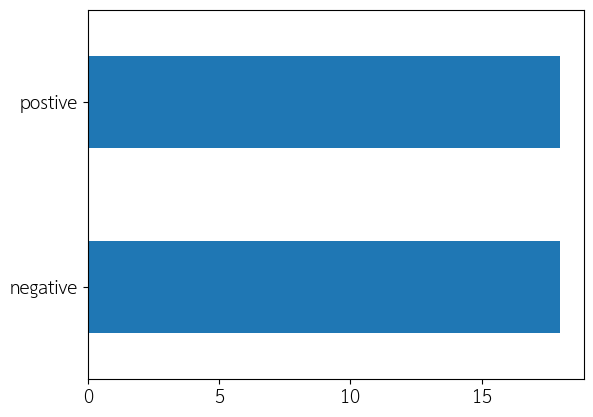

In [131]:
df.label.value_counts().plot.barh()
plt.show()

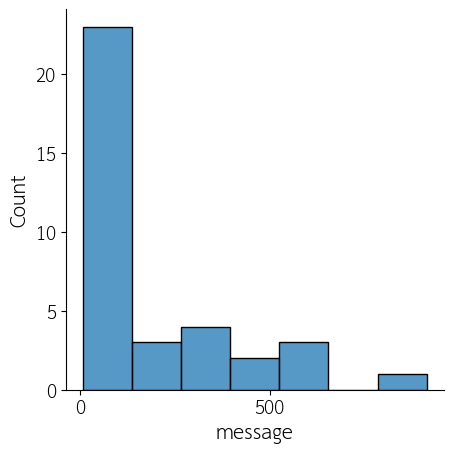

In [132]:
import seaborn as sns
sns.displot(df.message.apply(len))

<ipython-input-133-4b2c1bab19ba>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0.message.apply(len), hist = True, label = 'negative')
<ipython-input-133-4b2c1bab19ba>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1.message.apply(len), hist = True, label = 'positive')
/usr/lo

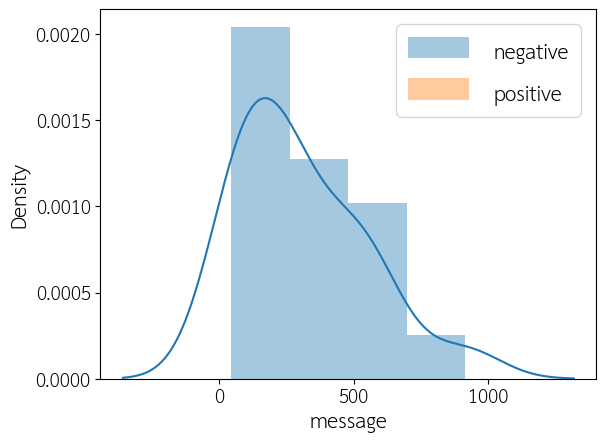

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns

# sort the data frame by target
target_0 = df.loc[df['label'] == 'negative']
target_1 = df.loc[df['label'] == 'positive']

sns.distplot(target_0.message.apply(len), hist = True, label = 'negative')
sns.distplot(target_1.message.apply(len), hist = True, label = 'positive')
plt.legend()
plt.show()

In [134]:
from pythainlp.util import find_keyword
from pythainlp.util import rank
from pythainlp.tokenize import word_tokenize

def get_text_list(message):
  tokenized = []
  for i in message:
    token = word_tokenize(i)
    for j in token:
      tokenized.append(j)
  return tokenized

text = get_text_list(df.message)
#rank(text)

find_keyword(text, min_len = 3)

{'สาขา': 22,
 'ซื้อ': 3,
 'พาย': 4,
 'ไก่': 4,
 'ชิ้น': 6,
 'ทาน': 4,
 'บริการ': 14,
 'ดี': 11,
 'โพ': 3,
 'พารากอน': 3,
 'คน': 7,
 'คุณภาพ': 5,
 'อาหาร': 10,
 'กิน': 16,
 'สอง': 3,
 'แย่': 3,
 'แบบนี้': 4,
 'ร้าน': 4,
 'BurgerKing': 7,
 'พนักงาน': 21,
 'ออเดอร์': 3,
 'สั่ง': 9,
 'เฟรนฟ': 6,
 'บอ': 5,
 'เดี๋ยว': 3,
 'โต๊ะ': 6,
 'นั่ง': 3,
 'รอ': 3,
 'ผู้จัดการ': 4,
 'เหมือน': 5,
 ' ': 25,
 'เส': 5,
 'ริ': 5,
 'ฟ': 4,
 'รอบ': 3,
 'ห่อ': 3,
 'พี่': 3,
 'ลูกค้า': 12,
 'เบอร์เกอร์': 7,
 'ชอบ': 10,
 'เจอ': 3,
 'คิง': 3,
 'แก้ว': 4,
 'ทอง': 3,
 'หล่อ': 3,
 'ทราบ': 3,
 'ทำ': 6,
 'อร่อย': 10,
 'ขาย': 3,
 'ปรับปรุง': 7,
 'ผม': 3,
 'ขอให้': 4,
 'เนื้อ': 3,
 'แผ่น': 4,
 'เลี่ยน': 3,
 'ขอบคุณ': 3,
 'หัวหน้างาน': 4,
 'น้ำเสียง': 3,
 'ใส่': 3,
 'ประทับใจ': 3,
 'น่ารัก': 4,
 'กก': 8}

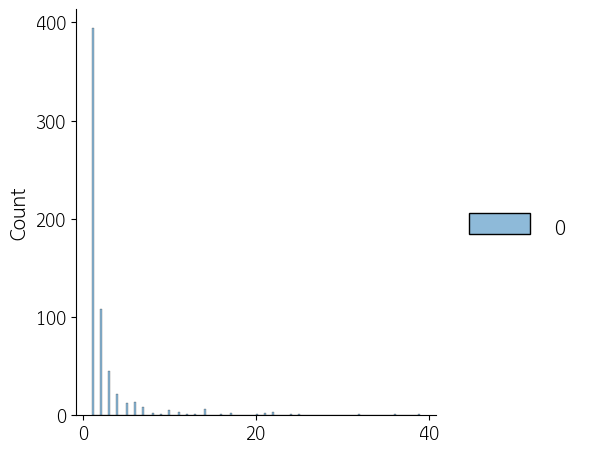

In [135]:
sns.displot(rank(text).values())

# text clound

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [137]:
regexp = r"[ก-๙a-zA-Z']+"

In [138]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

def get_text_str(message):
  tokenized = " "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized = tokenized + " " + j
  return tokenized

text = get_text_str(df.message)


In [139]:
df.message

0     นไปที่สาขาในปั๊มคาลเท็กซ์ประชานุกูลซื้อพายไก่แ...
1     BKทุกสาขาบริการดีโดยเฉพาะอย่างยิ่งเอมโพเรียมแม...
2     BurgerKingสาขาTheBrightพระรามบริการห่วยมากถึงม...
3     BurgerKingสาขาปั้มปตทบ้านพรอถลาง เมื่อคืนวันจั...
4        chickenstripชิ้นเล็กมากเทียบกับป้ายโฆษณาบนโต๊ะ
5     Deliveryไม่ทั่วถึงสาขาที่ใกล้เราที่สุดอยู่ทองห...
6     กิจกรรมที่จัดห่วยแตกได้รางวัลไม่แจ้งทางอินบ๊อก...
7     ขอแก้ไขรีวิวล่าสุดที่ไปมาตอนนี้อร่อยทุกอย่างแล...
8     ขอคอมเม้นต์นิดนึงครับวันนี้ผมมากินที่สาขาทางด่...
9     ขอบคุณที่ร่วมแชร์ประสบการณ์แย่ๆนะครับ สาขาEsso...
10    ขอร้องเรียนSupervisorผู้หญิงที่สาขาcentralworl...
11    ควรที่จะต้องปรับปรุงมารยาทพนักงานโดยเฉพาะที่สา...
12    ควรใส่ใจในการตรวจสอบสินค้ามากกว่านี้ไปมารอบขาด...
13    คืนวันที่มคไปใช้บริการBurgerKingสาขารามอินทราป...
14    ช่วงทุ่มไปใช้บริการที่หน้าร้านลูกค้าต่อคิวกันย...
15    ดูภาพwhopperที่ได้เทียบกับโฆษณาแล้วเอาไปปรับปร...
16    เดี๋ยวนี้คุณภาพรสชาติตกลงเยอะมากเบอร์เกอร์ที่ไ...
17    เดี๋ยวนี้เฟรนฟรายเค็มมากค่ะ ไม่รู้ว่าเกลือ

In [ ]:
!wget https://www.f0nt.com/download/sipafonts/THSarabunNew.zip ; unzip THSarabunNew.zip

--2023-06-29 04:03:11--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2023-06-29 04:03:13--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 

In [ ]:
path = 'THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path,
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000,
                      colormap='plasma',
                      scale=3,
                      font_step=4,
                    #   contour_width=3,
                      contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")
fig.show()

# Scatter Text

In [ ]:
df['tokenized'] = df.message.apply(word_tokenize)

In [ ]:
import collections

neg = df.loc[df.label == "negative"].tokenized
pos = df.loc[df.label == "positive"].tokenized
all = df.tokenized

count_neg = []
count_pos = []
count_all = []

for i in neg:
  for j in i:
    count_neg.append(j)
for i in pos:
  for j in i:
    count_pos.append(j)
for i in all:
  for j in i:
    count_all.append(j)

counter_pos=collections.Counter(count_neg)
counter_neg=collections.Counter(count_pos)
counter_all=collections.Counter(count_all)

your_list_neg = [list(i) for i in counter_neg.items()]
your_list_pos = [list(i) for i in counter_pos.items()]
your_list = [list(i) for i in counter_all.items()]

count = pd.DataFrame(your_list,columns=['Word','Counts'])
count_neg = pd.DataFrame(your_list_neg,columns=['Word','Counts_positive'])
count_pos = pd.DataFrame(your_list_pos,columns=['Word','Counts_negative'])


result = pd.merge(pd.merge(count,count_neg,on='Word'),count_pos,on='Word')

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

import matplotlib.font_manager as fm
from matplotlib import rcParams
x = result.Counts_negative.tolist()
y=result.Counts_positive.tolist()


plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0
plt.figure(figsize=(20, 20))
rcParams.update({'font.size': 22})
plt.scatter(x, y,s=1)
plt.xlim(0,20)
plt.ylim(0,20)


for i, txt in enumerate(result.Word.tolist()):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('foo.pdf')

# Co-Occurance Analysis

In [ ]:
#!pip install pythainlp[full]
import numpy as np
import pandas as pd
from pythainlp.tokenize import word_tokenize

def create_cooccurrence_matrix(sentences, window_size=4):
    """Create co occurrence matrix from given list of sentences.

    Returns:
    - vocabs: dictionary of word counts
    - co_occ_matrix_sparse: sparse co occurrence matrix

    Example:
    ===========
    sentences = ['I love nlp',    'I love to learn',
                 'nlp is future', 'nlp is cool']

    vocabs,co_occ = create_cooccurrence_matrix(sentences)

    df_co_occ  = pd.DataFrame(co_occ.todense(),
                              index=vocabs.keys(),
                              columns = vocabs.keys())

    df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

    df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')

    """
    import scipy
    import nltk

    vocabulary = {}
    data = []
    row = []
    col = []

    tokenizer = word_tokenize
    #tokenizer = nltk.tokenize.word_tokenize

    for sentence in sentences:
        sentence = sentence.strip()

        tokens = [token for token in tokenizer(sentence) if token != u""]
        for pos, token in enumerate(tokens):
            i = vocabulary.setdefault(token, len(vocabulary))
            start = max(0, pos-window_size)
            end = min(len(tokens), pos+window_size+1)
            for pos2 in range(start, end):
                if pos2 == pos:
                    continue
                j = vocabulary.setdefault(tokens[pos2], len(vocabulary))
                data.append(1.)
                row.append(i)
                col.append(j)

    cooccurrence_matrix_sparse = scipy.sparse.coo_matrix((data, (row, col)))
    return vocabulary, cooccurrence_matrix_sparse


In [ ]:
#import nltk
#nltk.download('punkt')
#sentences = ['I love nlp',    'I love to learn',
#             'nlp is future', 'nlp is cool']

sentences = df.message
vocabs,co_occ = create_cooccurrence_matrix(sentences)

df_co_occ  = pd.DataFrame(co_occ.todense(),
                          index=vocabs.keys(),
                          columns = vocabs.keys())

df_co_occ = df_co_occ.sort_index()[sorted(vocabs.keys())]

df_co_occ.style.applymap(lambda x: 'color: red' if x>0 else '')


In [ ]:
df_co_occ

In [ ]:
#!pip install networkx
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = fm.createFontList(['THSarabunNew.ttf'])
fm.fontManager.ttflist.extend(font_list)



In [ ]:
def visual_co_occ_matrix(keyword,top_co_occ = 10):
  ### keyword เป็น str ###
  graph = nx.Graph()
  labels_params = {"font_family": "TH Sarabun Chula",
                 "alpha":1,
                 "font_size":20,
                 "with_labels": True}
  word =[]

  for i in df_co_occ.loc[keyword].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
    if i not in thai_stopwords():
      graph.add_edge(keyword,i)
      word.append(i)
      for j in df_co_occ.loc[i].sort_values(ascending = False).reset_index()['index'][:top_co_occ]:
        if j not in thai_stopwords():
          graph.add_edge(i,j)

  return nx.draw(graph,node_color='#00b4d9', **labels_params)

In [ ]:
visual_co_occ_matrix('BurgerKing')